In [11]:
from Document import Document
from ParserCACM import ParserCACM
from ParserQuery import QueryParser
from porter import stem
from TextRepresenter import PorterStemmer
import pickle
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

from EvalIRModel import EvalIRModel
from Index import Index, InvertedIndexPlaces
from Weighter import WeighterBoolean, WeighterVector
from IRModel import Vectoriel, LanguageModel, BM25Model, LinearMetaModel
from Featurer import Featurer

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
index = Index("cacm", "cacm/cacm.txt")
#index.indexation()
#weighter = WeighterVector(index)
#weighter.calculeNorms()
#model = Vectoriel(weighter)
#model = BM25Model(weighter)
#model = LanguageModel(weighter)

In [3]:
featurer = Featurer(index)
#stemmer = PorterStemmer()

precalcul features


In [ ]:
query = "test"
#featurer.calculate_features_query_doc(1771, query)
featurer.get_features('1', query)

In [28]:
lin_model = LinearMetaModel(featurer)

In [30]:
lin_model.train(5, 0.0001, 0.1)

In [33]:
lin_model.thetas

array([ 0.02349583, -2.68997577, -1.21423546, -0.07820245,  0.16242212,
        0.90711167, -2.03755185])

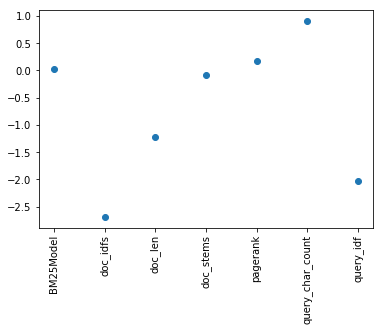

In [31]:
plt.scatter(np.arange(7), lin_model.thetas)
plt.xticks(np.arange(7),lin_model.attribute_names, rotation='vertical');

In [ ]:
qp = QueryParser()
qp.initFile(filename_queries="cacm/cacm.qry",filename_jugements="cacm/cacm.rel")

In [ ]:
qp.get_query_min_max(index)